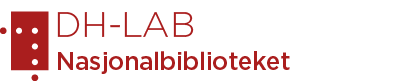

In [1]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import pandas as pd
from dhlab.module_update import update, css, code_toggle
%matplotlib inline

In [2]:
css()

## 1. Frekvenslister

Frekvenslister fra tekster kan danne utgangspunkt for mye informasjon om teksten.

Her bruker vi funksjonen `nb.get_freq(urn)` for å hente frekvensklister (absoluttfrekvenser) fra boka.

`urn`er identifikator for boka i Nasjonalbibliotekets samling. Under eksempelfila om korpusbygging() finnes mer informasjon om hvordan man bygger et korpus. Urn finner man i bokas metadata, og de er på denne formen: https://urn.nb.no/URN:NBN:no-nb_digibok_2012051608012. Det er de 13 sifrene på slutten vi bruker her.

### 1.1. Frekvensliste for enkeltbøker

#### 1.1.1. Kort sakprosabok

In [2]:
bok = nb.frame(nb.get_freq(2012051608012)).sort_values(by=0, ascending=False)
bok.head(20)

# Fra frekvenslista kan vi se at:
    # "i" har høyere frekvens enn "," - da kan vi anta at det er en sakprosatekst
    # "vann" er det sjette mest frekvente ordet, altså handler teksten om vann
    # 348 punktum, dette er en kort tekst. (Punktum ligger rundt 5% av teksters lengde)

,0
.,351
i,132
",",120
og,118
-,82
vann,81
det,80
av,75
?,65
:,64


Vi kan sammenlikne frekvenslista for boka med et større korpus, som vi her legger i variabelen tot

In [3]:
tot = nb.frame(nb.totals(50000))

Vi lager en dataramme, `nb.frame()` for forholdet mellom frekvensene for ordene i vann og for de 50000 mest frekvente ordene i hele nb.no

In [4]:
nb.frame((bok[0]/tot[0]).sort_values(ascending=False).head(20))

,0
pH,6.693557e-05
vannet,3.170662e-05
vann,2.410255e-05
3.,2.877808e-06
2.,2.790202e-06
~,1.880605e-06
1.,1.573549e-06
e,1.334419e-06
r,1.159462e-06
ned,1.092663e-06


#### 1.1.2. Knausgårds *Min kamp / Første bok*

In [8]:
min_kamp_1 = nb.frame(nb.get_freq(2014032405041, top=0, cutoff=0)).sort_values(by=0, ascending=False)
min_kamp_1.head(20)

,0
",",14332
.,9480
og,5383
det,4430
jeg,4175
i,3657
var,3238
på,3152
-,2500
som,2463


In [7]:
nb.frame((min_kamp_1[0]/tot[0]).sort_values(ascending=False).head(20))

,0
Yngve,0.009316
sa,0.000058
jeg,0.000053
meg,0.000052
gikk,0.000045
ned,0.000036
Jeg,0.000033
hadde,0.000028
noen,0.000026
opp,0.000023


### 1.2. Sammenlikning av frekvens for ulike bøker

In [8]:
vestly = nb.get_corpus_text(nb.book_urn(author='Vestly%Anne%', limit=20))
vestly.head()

,2008052804024,2015073008008,2014103008164,2007030901057,2008071604033,2008111304167,2011031005056,2015062308069,2007072600025,2010070605087,2014031108251,2010071608086,2008051504082,2009041600050,2010043003036,2016052008054,2014013106097,2012092106162,2013100305183,2013061206113
",",2883.0,2547.0,355.0,2847.0,2689.0,4736.0,2227.0,2763.0,2845.0,1795.0,1269.0,3876.0,1263.0,2061.0,4741.0,257.0,2509.0,2104.0,2528.0,2885.0
.,2377.0,2224.0,319.0,2524.0,2311.0,3492.0,1687.0,2277.0,2231.0,1859.0,1208.0,3005.0,1200.0,1964.0,3477.0,237.0,2184.0,1695.0,1875.0,2199.0
«,1806.0,1434.0,151.0,1473.0,1295.0,2144.0,1007.0,1528.0,1434.0,1028.0,539.0,1941.0,540.0,782.0,2145.0,112.0,1446.0,846.0,1291.0,1435.0
»,1777.0,1434.0,151.0,1380.0,1276.0,2116.0,999.0,1532.0,1431.0,1022.0,526.0,1929.0,528.0,782.0,2110.0,108.0,1429.0,821.0,1277.0,1432.0
og,1450.0,1301.0,244.0,1228.0,1621.0,3539.0,1174.0,1482.0,1462.0,885.0,902.0,1975.0,899.0,1388.0,3536.0,166.0,1298.0,1664.0,1688.0,1453.0


In [9]:
# Vi kan legge på et varmekart for lettere å få oversikt

nb.heatmap(vestly.head(20))

,2008052804024,2015073008008,2014103008164,2007030901057,2008071604033,2008111304167,2011031005056,2015062308069,2007072600025,2010070605087,2014031108251,2010071608086,2008051504082,2009041600050,2010043003036,2016052008054,2014013106097,2012092106162,2013100305183,2013061206113
",",2883,2547,355,2847,2689,4736,2227,2763,2845,1795,1269,3876,1263,2061,4741,257,2509,2104,2528,2885
.,2377,2224,319,2524,2311,3492,1687,2277,2231,1859,1208,3005,1200,1964,3477,237,2184,1695,1875,2199
«,1806,1434,151,1473,1295,2144,1007,1528,1434,1028,539,1941,540,782,2145,112,1446,846,1291,1435
»,1777,1434,151,1380,1276,2116,999,1532,1431,1022,526,1929,528,782,2110,108,1429,821,1277,1432
og,1450,1301,244,1228,1621,3539,1174,1482,1462,885,902,1975,899,1388,3536,166,1298,1664,1688,1453
sa,1195,943,62,400,872,1451,673,1032,919,613,262,1268,263,497,1450,53,951,578,830,918
det,890,791,141,634,952,1772,734,958,814,629,500,1185,499,773,1770,93,795,870,916,811
Lillebror,745,654,0,0,0,7,0,644,703,0,0,1008,0,0,7,0,653,1,0,693
så,744,647,76,356,728,1096,617,709,713,498,365,1022,367,535,1097,85,651,571,630,714
på,618,604,87,313,647,1157,495,676,641,488,367,814,367,634,1156,76,605,643,639,632


### 1.3. Frekvens for spesifikke termer

In [10]:
def heatmap_loc(dr, ordliste, sorter=0):
    df = dr.loc[ordliste]
    return nb.heatmap(df.sort_values(by=df.columns[sorter], ascending=False))

In [11]:
# Her lager vi en funksjon heatmap_loc som vi bruker for å plukke ut enkelte ord fra korpuset som vi vil sammenlikne.


heatmap_loc(vestly, "Mormor Morten Marte Ole Aleksander Guro Lillebror Knerten".split())


,2008052804024,2015073008008,2014103008164,2007030901057,2008071604033,2008111304167,2011031005056,2015062308069,2007072600025,2010070605087,2014031108251,2010071608086,2008051504082,2009041600050,2010043003036,2016052008054,2014013106097,2012092106162,2013100305183,2013061206113
Lillebror,745,654,0,0,0,7,0,644,703,0,0,1008,0,0,7,0,653,1,0,693
Knerten,386,299,0,0,0,10,0,431,330,0,0,574,0,0,10,0,296,6,0,329
Ole,10,2,84,0,2,0,1,0,5,458,309,0,315,46,0,73,2,10,0,0
Aleksander,10,0,81,0,1,0,1,0,5,413,287,0,293,40,0,67,0,10,0,0
Guro,4,0,0,0,0,93,0,0,7,0,0,0,0,0,93,0,0,7,6,0
Mormor,1,0,0,24,3,112,2,0,1,0,0,0,0,54,112,0,0,1,65,0
Morten,1,0,0,84,6,34,0,0,1,0,0,0,0,135,34,0,0,1,14,0
Marte,1,0,0,22,1,4,0,0,1,0,0,0,0,22,4,0,0,1,3,0


In [12]:
# Er forfatteren konsekvent når det kommer til ordformer?

heatmap_loc(vestly, "boken boka sola solen".split())

,2008052804024,2015073008008,2014103008164,2007030901057,2008071604033,2008111304167,2011031005056,2015062308069,2007072600025,2010070605087,2014031108251,2010071608086,2008051504082,2009041600050,2010043003036,2016052008054,2014013106097,2012092106162,2013100305183,2013061206113
solen,8,1,0,1,2,5,0,1,0,2,0,1,0,3,5,0,1,4,3,0
boken,3,7,0,0,17,0,2,2,0,1,1,2,1,1,0,0,7,0,9,0
boka,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0
sola,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0


## 2. Sttr

Standardized text token ratio er et mål på ordvariasjon i en tekst.
    

In [13]:
# Knausgårds bok Min kamp har en ganske vanlig verdi for romaner for voksne

min_kamp_sttr = nb.sttr(2014032405041)
min_kamp_sttr

0.2861639426199769

In [14]:
# Den korte sakprosaboka om vann får en uvanlig høy verdi fordi teksten er så kort. 

bok_sttr = nb.sttr(2012051608012)
bok_sttr

0.5156109613656784

In [16]:
# Rune Slagstads 'De nasjonale strateger' har en høy verdi til å være en bok på over 600 sider

nasjonale_strateger_sttr = nb.sttr(2011041306001)
nasjonale_strateger_sttr

0.3967847453469051

### 2.1. STTR på et korpus

In [17]:
urns = nb.book_urn(author='Vestly%Anne%', limit=20)

res =[]

for x in urns: 
    res.append([nb.sttr(x[0])]+x)
    
nb.frame(res, 'sttr urn forfatter tittel år'.split())

,sttr,urn,forfatter,tittel,år
0,0.231082,2008100104085,"Vestly, Anne-Cath.",Huset i skogen,1998
1,0.209560,2011060106049,"Vestly, Anne-Cath.",Monrad tenker,2002
2,0.241769,2010111005094,"Vestly, Anne-Cath.","Åtte små, to store og en lastebil",1961
3,0.207571,2011031005056,"Vestly, Anne-Cath.",Aurora og pappa,2000
4,0.206859,2015073008008,"Vestly, Anne-Cath.",Knerten flytter,2010
5,0.222355,2009041404081,"Vestly, Anne-Cath.",Mormor og de åtte ungene,1998
6,0.214559,2015052808178,"Vestly, Anne-Cath.",Mormor og de åtte ungene i skogen,1982
7,0.198115,2009011200084,"Vestly, Anne-Cath.",Lillebror og Knerten,1997
8,0.255520,2013100305183,"Vestly, Anne-Cath.",5 på reise,1994
9,0.211800,2009032304045,"Vestly, Anne-Cath.",Kaos førskolegutt,1999
